# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [2]:
# Replace `pass` with appropriate code
def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    result = (check_amt - 20) / 2
    return result

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [3]:
# Code here 
print(z_score(24))

2.0


In [ ]:
"""
Written answer here
Our price of $24 on the check means it is 2 standard deviations away from the mean.
"""

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [16]:
# Code here
# alpha = 0.05
p_value = (1 - .97982)
p_value

0.020179999999999976

In [9]:
"""
Written answer here
Since our z score is 2.0 which mean its 2 std. deviations away from the mean we can say it is siginificantly greater than the mean
"""

'\nWritten answer here\nSince our z score is 2.0 which mean its 2 std. deviations away from the mean we can say it is siginificantly greater than the mean.\n'

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [ ]:
# Code here 
mean = 20
sample = 24
st.dev = 2
95% confidence interval = 1.96 (zscore)

In [ ]:
"""
Written answer here
Since our Zscore is 2 for the sample price is 24$ we would be outside of confidence interval.
Without the n for the sample price I didn't know how to figure out the actual amounts but it would have landed within the ranges of 16.50ish and 23.50ish
"""

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
"""
Written answer here
Sampling would allow us to get the sample mean and st.dev. and doing this process multiple times over multiple samples
central limit theorem says that we will get a normal distribution and approximate population mean and st.dev in the end
"""

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

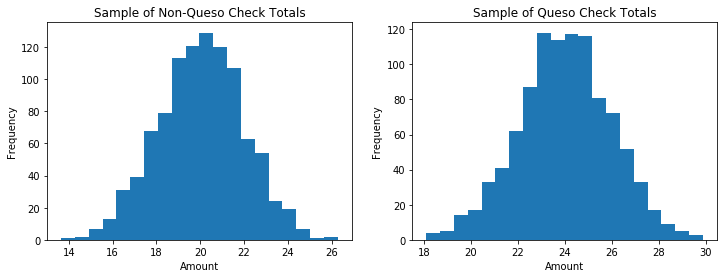

In [6]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

In [ ]:
"""
Written answer here
The Null Hypthesis is there is no significant difference between how much the customers spend
The Alternative Hypthoesis is that customers spend different amounts based on if they ordered queso or not
"""

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

In [ ]:
"""
Written answer here
Type 1 error is when we reject the null when its true.
We think customers spend different amounts based on queso purchase when in reality they do not.

Type 2 error is when we fail to reject a null hypothesis that is actually false
We think customers spend the same amount regardless of queso purchase when in reality they do spend different amounts.
"""

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [8]:
# Code here 
stats.ttest_ind(no_queso,queso)

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

In [ ]:
"""
Written answer here
Yes we can reject the null hypothesis since:
p value is extremely close to 0 which is less than alpha/2 = 0.025
"""

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

Bayes Formula = P(A|B) = P(B|A)* P(A)/ P(B)

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [18]:
# Code here to find the probability
P_smallpup = (.2*.6) + (.8*.1)
P_smallpup

0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [21]:
# Code here to find the probability
# A = pet store
# B = Large puppy
# P_LPPS = (P(LP|PS) * P(PS) / P(LP))
P_LPPS = (.1 * .2 / (.2*.1 + .8*.55))
P_LPPS

0.043478260869565216

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [27]:
"""
Written answer here for which is more likely
A = PS / PD
B = SP
P(A|B) = P(SP|PS[PD]) * P(PS[PD]) / P(SP)
P_SPPS so getting a small puppy at the pet store is the greater of the two chances.
"""
P_SPPS = (.6 * .2)/P_smallpup
P_SPPD = (.1 * .8)/P_smallpup
print(P_SPPS,P_SPPD)

0.6 0.4000000000000001


### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [ ]:
"""
Written answer here for the prior
Probability of Pet Store
Written answer here for the posterior
Probability of Large Puppy
Written answer here for the likelihood
Probablity of large puppy given pet store
"""

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [22]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [23]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

In [28]:
# Code here 
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


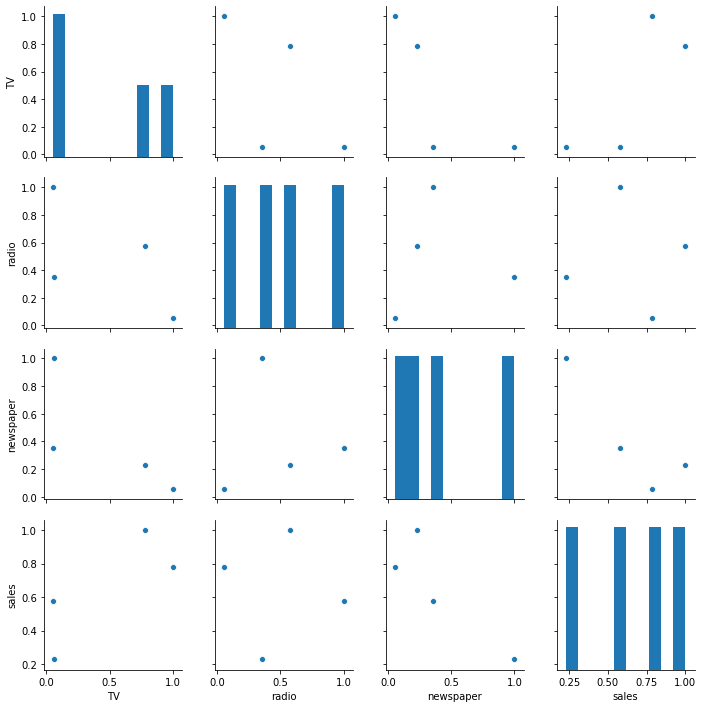

In [34]:
sns.pairplot(data.corr())

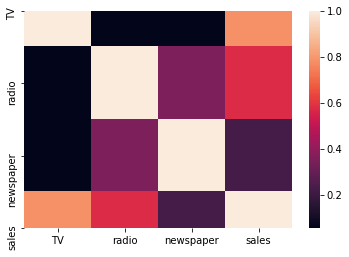

In [35]:
sns.heatmap(data.corr())

### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

In [ ]:
"""
Written answer here
No since most of the variables dont really seem to correlate with each other.
"""

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [33]:
# Code here 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 18 Mar 2020   Prob (F-statistic):                   2.43e-171
Time:                        10:39:37   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

In [ ]:
"""
Written answer here
The R Squared is 0.982 which is great.
"""